In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [16]:
df = pd.read_csv("final/isosyote_df.csv")
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Taivalkoski parish,2004,1,1,2004-01-01,29.0,-30.5,NaN,0.2
1,Taivalkoski parish,2004,1,2,2004-01-02,29.0,-13.7,NaN,-0.2
2,Taivalkoski parish,2004,1,3,2004-01-03,29.0,-10.7,NaN,0.3
3,Taivalkoski parish,2004,1,4,2004-01-04,29.0,-12.7,NaN,-0.4
4,Taivalkoski parish,2004,1,5,2004-01-05,30.0,-14.6,NaN,-1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7604 entries, 0 to 7603
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Observation station           7604 non-null   object 
 1   Year                          7604 non-null   int64  
 2   Month                         7604 non-null   int64  
 3   Day                           7604 non-null   int64  
 4   Date                          7604 non-null   object 
 5   Snow depth mean [cm]          7597 non-null   float64
 6   Average temperature [°C]      7604 non-null   float64
 7   cloud_code                    6760 non-null   float64
 8   Global radiation mean [W/m2]  7547 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 534.8+ KB


In [18]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df.head()

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],day_of_year
0,2004,1,1,2004-01-01,29.0,-30.5,NaN,0.2,1
1,2004,1,2,2004-01-02,29.0,-13.7,NaN,-0.2,2
2,2004,1,3,2004-01-03,29.0,-10.7,NaN,0.3,3
3,2004,1,4,2004-01-04,29.0,-12.7,NaN,-0.4,4
4,2004,1,5,2004-01-05,30.0,-14.6,NaN,-1.0,5


In [19]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [20]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.6442641745301982
Mean Squared Error: 319.26756518668054


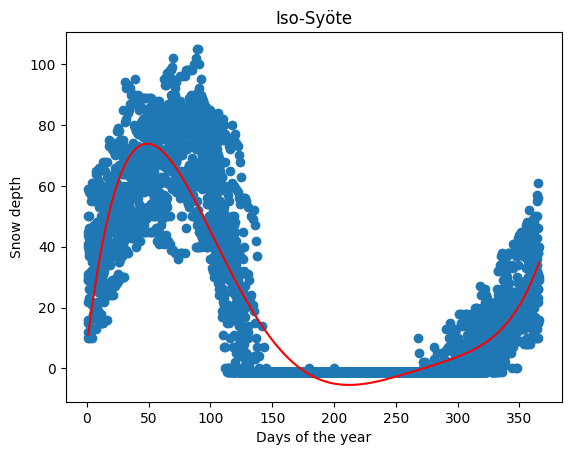

In [25]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 5))

myline = np.linspace(1, 366, 100)

plt.scatter(X_train["day_of_year"], y_train)
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel("Days of the year")
plt.ylabel("Snow depth")
plt.title("Iso-Syöte")
plt.show()

In [26]:
snowdept = mymodel(range(1,28))
print(snowdept)

[11.10856367 14.20601109 17.20366766 20.1032638  22.90651243 25.61510906
 28.23073182 30.75504163 33.18968218 35.53628011 37.79644503 39.9717696
 42.06382968 44.07418434 46.00437595 47.85593033 49.63035675 51.32914806
 52.95378076 54.50571508 55.98639508 57.39724869 58.73968786 60.01510857
 61.22489098 62.37039946 63.4529827 ]


In [27]:
joblib.dump(model, 'isosyote_snow_depth_predictor.pkl')

['isosyote_snow_depth_predictor.pkl']